In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/iris-flower-dataset/IRIS.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df=pd.read_csv('./IRIS.csv')


In [ ]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
df.nunique()


,0
sepal_length,35
sepal_width,23
petal_length,43
petal_width,22
species,3


In [ ]:
df.describe(include='all')


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
s_size=df['sepal_length']*df['sepal_width']
df.insert(1,'sepal_size',s_size)

In [ ]:
p_size=df['petal_length']*df['petal_width']
df.insert(2,'petal_size',p_size)

In [ ]:
df.drop(['sepal_length','sepal_width','petal_length','petal_width'] \
        ,axis=1,inplace=True)

[]

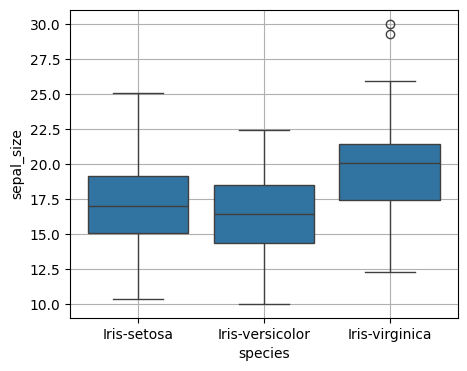

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(x=df['species'],y=df['sepal_size'])
plt.grid()
plt.plot()

In [ ]:
i=df[(df['species']=='Iris-virginica') & (df['sepal_size']>27)].index
df.drop(i,inplace=True)

[]

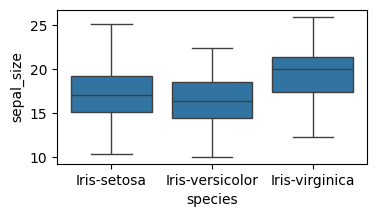

In [ ]:
plt.figure(figsize=(4,2))
sns.boxplot(x=df['species'],y=df['sepal_size'])
plt.plot()

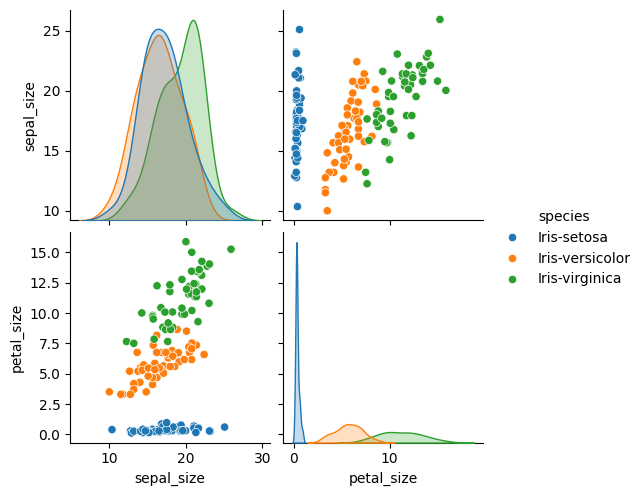

In [ ]:
sns.pairplot(df,hue='species')
plt.show()

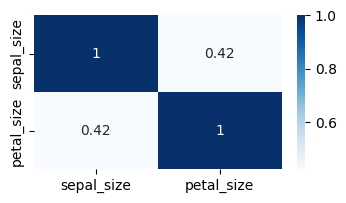

In [ ]:
plt.figure(figsize=(4,2))
sns.heatmap(df.select_dtypes(include=[float, int]).corr(), annot=True, cmap='Blues')
plt.show()


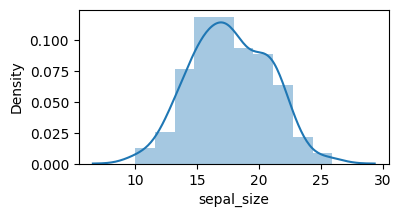

In [ ]:
plt.figure(figsize=(4,2))
sns.distplot(df['sepal_size'])
plt.show()

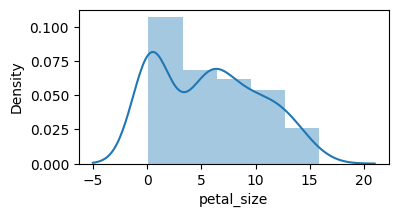

In [ ]:
plt.figure(figsize=(4,2))
sns.distplot(df['petal_size'])
plt.show()

In [ ]:
from scipy.stats import skew
df['petal_size'].skew()

0.2792323121558519

In [ ]:
df.head(3)


,sepal_size,petal_size,species
0,17.85,0.28,Iris-setosa
1,14.70,0.28,Iris-setosa
2,15.04,0.26,Iris-setosa


In [ ]:
df.sample(5)

,sepal_size,petal_size,species
116,19.50,9.90,Iris-virginica
109,25.92,15.25,Iris-virginica
57,11.76,3.30,Iris-versicolor
105,22.80,13.86,Iris-virginica
39,17.34,0.30,Iris-setosa


In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df.iloc[:,:-1]=ss.fit_transform(df.iloc[:,:-1])
df.head()

,sepal_size,petal_size,species
0,0.065968,-1.166207,Iris-setosa
1,-0.955762,-1.166207,Iris-setosa
2,-0.845480,-1.170522,Iris-setosa
3,-1.098480,-1.161892,Iris-setosa
4,0.114621,-1.166207,Iris-setosa


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(118, 2)
(30, 2)
(118,)
(30,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f'Accuracy: {acc}\n\n {cm} \n\n {cr}')

Accuracy: 0.9666666666666667

 [[10  0  0]
 [ 0 13  0]
 [ 0  1  6]] 

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.98      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
trainscore=knn.score(xtrain,ytrain)
testscore=knn.score(xtest,ytest)
print(f'Training Accuracy: {trainscore}\n\n Testing Accuracy: {testscore}')

Training Accuracy: 0.9661016949152542

 Testing Accuracy: 0.9666666666666667


In [ ]:
df=pd.read_csv('./IRIS.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(xtrain,ytrain)
ypred=knr.predict(xtest)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)
print(mae)
print(mse)
print(rmse)
print(r2)

0.033333333333333326
0.011999999999999993
0.1095445115010332
0.9777319587628867


In [ ]:
trainscore=knr.score(xtrain,ytrain)
testscore=knr.score(xtest,ytest)
print(f'Training Accuracy: {trainscore}\n\n Testing Accuracy: {testscore}')

Training Accuracy: 0.9676295923502768

 Testing Accuracy: 0.9777319587628867


In [ ]:
trainsc=[]
testsc=[]
for i in range(1,31):
    knr=KNeighborsRegressor(n_neighbors=i)
    knr.fit(xtrain,ytrain)

    train=knr.score(xtrain,ytrain)
    test=knr.score(xtest,ytest)

    trainsc.append(train)
    testsc.append(test)

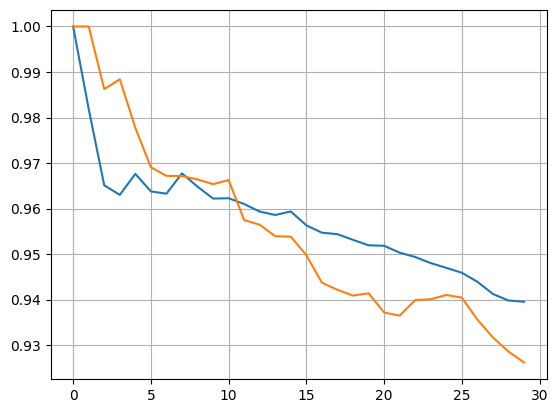

In [ ]:
plt.plot(trainsc)#Bias
plt.plot(testsc)#Variance
plt.grid()
plt.show()
#at 6/7 our bias and variance our intercepting i.e 6/7 is the best  K Value where
#our there wont be overfitting or underfitting in our model

In [ ]:
knr=KNeighborsRegressor(n_neighbors=6)
knr.fit(xtrain,ytrain)
ypred=knr.predict(xtest)

In [ ]:
mse=mean_squared_error(ytest,ypred)
r2=r2_score(ytest,ypred)
print(mse)
print(r2)

0.016666666666666663
0.9690721649484536


In [ ]:
trainscore=knr.score(xtrain,ytrain)
testscore=knr.score(xtest,ytest)
print(f'Training Accuracy: {trainscore}\n\n Testing Accuracy: {testscore}')

Training Accuracy: 0.9637644690488173

 Testing Accuracy: 0.9690721649484536
